<a href="https://colab.research.google.com/github/garguday672004/topsis/blob/main/topsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-criteria

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for methodtools: filename=methodtools-0.4.7-py3-none-any.whl size=3965 sha256=7453e5c8c4ca7cce650ab2fe64e4a9d26beb5dc8e0fc94a260301123494afa3f
  Stored in directory: /root/.cache/pip/wheels/54/4a/b1/3622715dee5b0f97ae92b774cf70219200a6f0d69aafa0cc85
  Created wheel for wirerope: filename=wirerope-0.4.7-py3-none-any.whl size=8968 sha256=9a27a636e0c6275770498090fef8f8dc271b9436233f159e6b9cb6f99f603a17
  Stored in directory: /root/.cache/pip/wheels/3d/27/0c/b5fb8fa4e4f5f476207da8f779fc68c4e4c72da63e4b0db53d
Successfully built methodtools wirerope
  Attempting uni

Results:
     Model  Rouge-1    F1  Closeness  Rank
0  Model A     0.75  0.88   0.000000   3.0
1  Model B     0.82  0.92   1.000000   1.0
2  Model C     0.79  0.90   0.535532   2.0


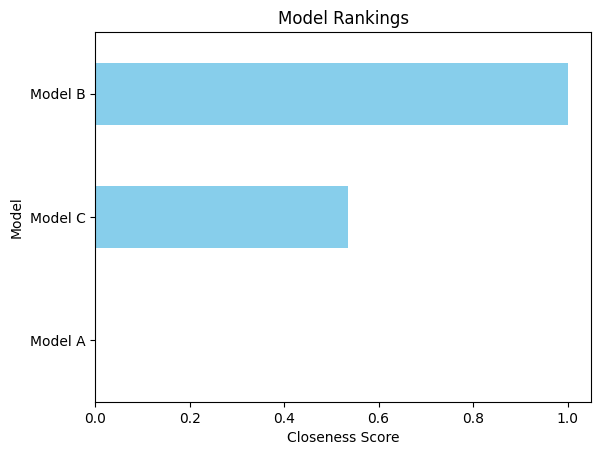

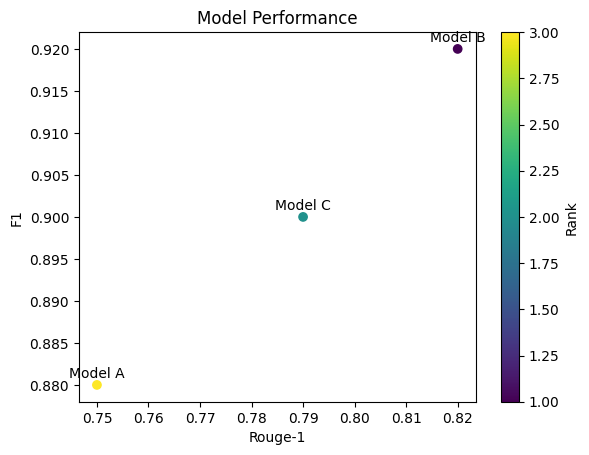

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {
    'Model': ['Model A', 'Model B', 'Model C'],
    'Rouge-1': [0.75, 0.82, 0.79],
    'F1': [0.88, 0.92, 0.90],
}

df = pd.DataFrame(data)

# Normalize data
normalized_data = df[['Rouge-1', 'F1']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Create weights for each criterion
weights = [0.5, 0.5]  # Adjust weights based on the importance of each criterion

# Calculate weighted normalized decision matrix
weighted_normalized_matrix = normalized_data * weights

# Define ideal and negative-ideal solutions
ideal_solution = np.max(weighted_normalized_matrix, axis=0)
negative_ideal_solution = np.min(weighted_normalized_matrix, axis=0)

# Calculate Euclidean distances to ideal and negative-ideal solutions
distance_to_ideal = np.linalg.norm(weighted_normalized_matrix - ideal_solution, axis=1)
distance_to_negative_ideal = np.linalg.norm(weighted_normalized_matrix - negative_ideal_solution, axis=1)

# Calculate performance scores
closeness = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)

# Rank models based on closeness
df['Closeness'] = closeness
df['Rank'] = df['Closeness'].rank(ascending=False)

# Display results
print("Results:")
print(df)

# Plot bar chart for rankings
fig, ax = plt.subplots()
df[['Model', 'Closeness']].sort_values(by='Closeness').plot(kind='barh', x='Model', y='Closeness', ax=ax, legend=False, color='skyblue')
ax.set_title('Model Rankings')
ax.set_xlabel('Closeness Score')
ax.set_ylabel('Model')

# Plot scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(df['Rouge-1'], df['F1'], c=df['Rank'], cmap='viridis', marker='o')
ax.set_title('Model Performance')
ax.set_xlabel('Rouge-1')
ax.set_ylabel('F1')
for i, txt in enumerate(df['Model']):
    ax.annotate(txt, (df['Rouge-1'][i], df['F1'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Rank')

# Show plots
plt.show()
